Методы повышения размерности

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

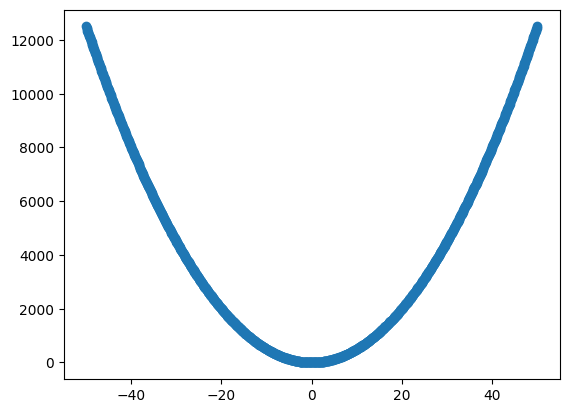

In [88]:
def parabola(x, a = 5, b = 0, c = 0):
  y = a * (x**2) + b*x + c
  return y

plt.scatter(np.linspace(-50, 50, 1000), parabola(np.linspace(-50, 50, 1000)))
plt.show()

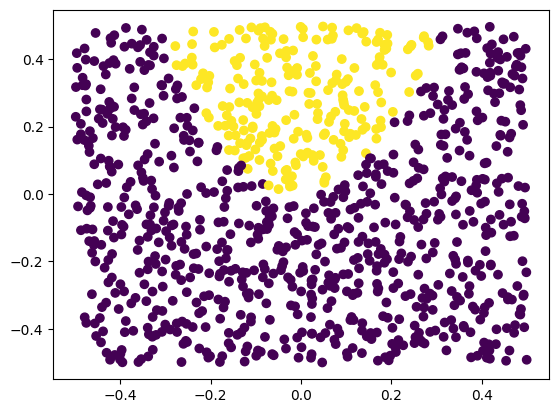

In [89]:
x = (np.random.rand(1000, 2)-0.5)* 1
y = (x[:, 1] > parabola(x[:, 0])).astype(int)

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

In [90]:
from sklearn.tree import DecisionTreeClassifier
import graphviz

clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(x, y)
score = clf.score(x, y)
print("score - " , score)
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytreе")

score -  0.871


'mytreе.pdf'

In [91]:
x2 = np.concatenate([x, x[:, 0:1] ** 2], axis = 1)
print(x2.shape)

(1000, 3)


In [92]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(x2, y)
score = clf.score(x2, y)
print("score - " , score)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytreе")

score -  0.961


'mytreе.pdf'

In [93]:
#Polynomial features
from sklearn.preprocessing import PolynomialFeatures
tr = PolynomialFeatures(2)
x2 = tr.fit_transform(x)
print(x2.shape)

(1000, 6)


In [94]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(x2, y)
score = clf.score(x2, y)
print("score - " , score)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytreе")

score -  0.961


'mytreе.pdf'

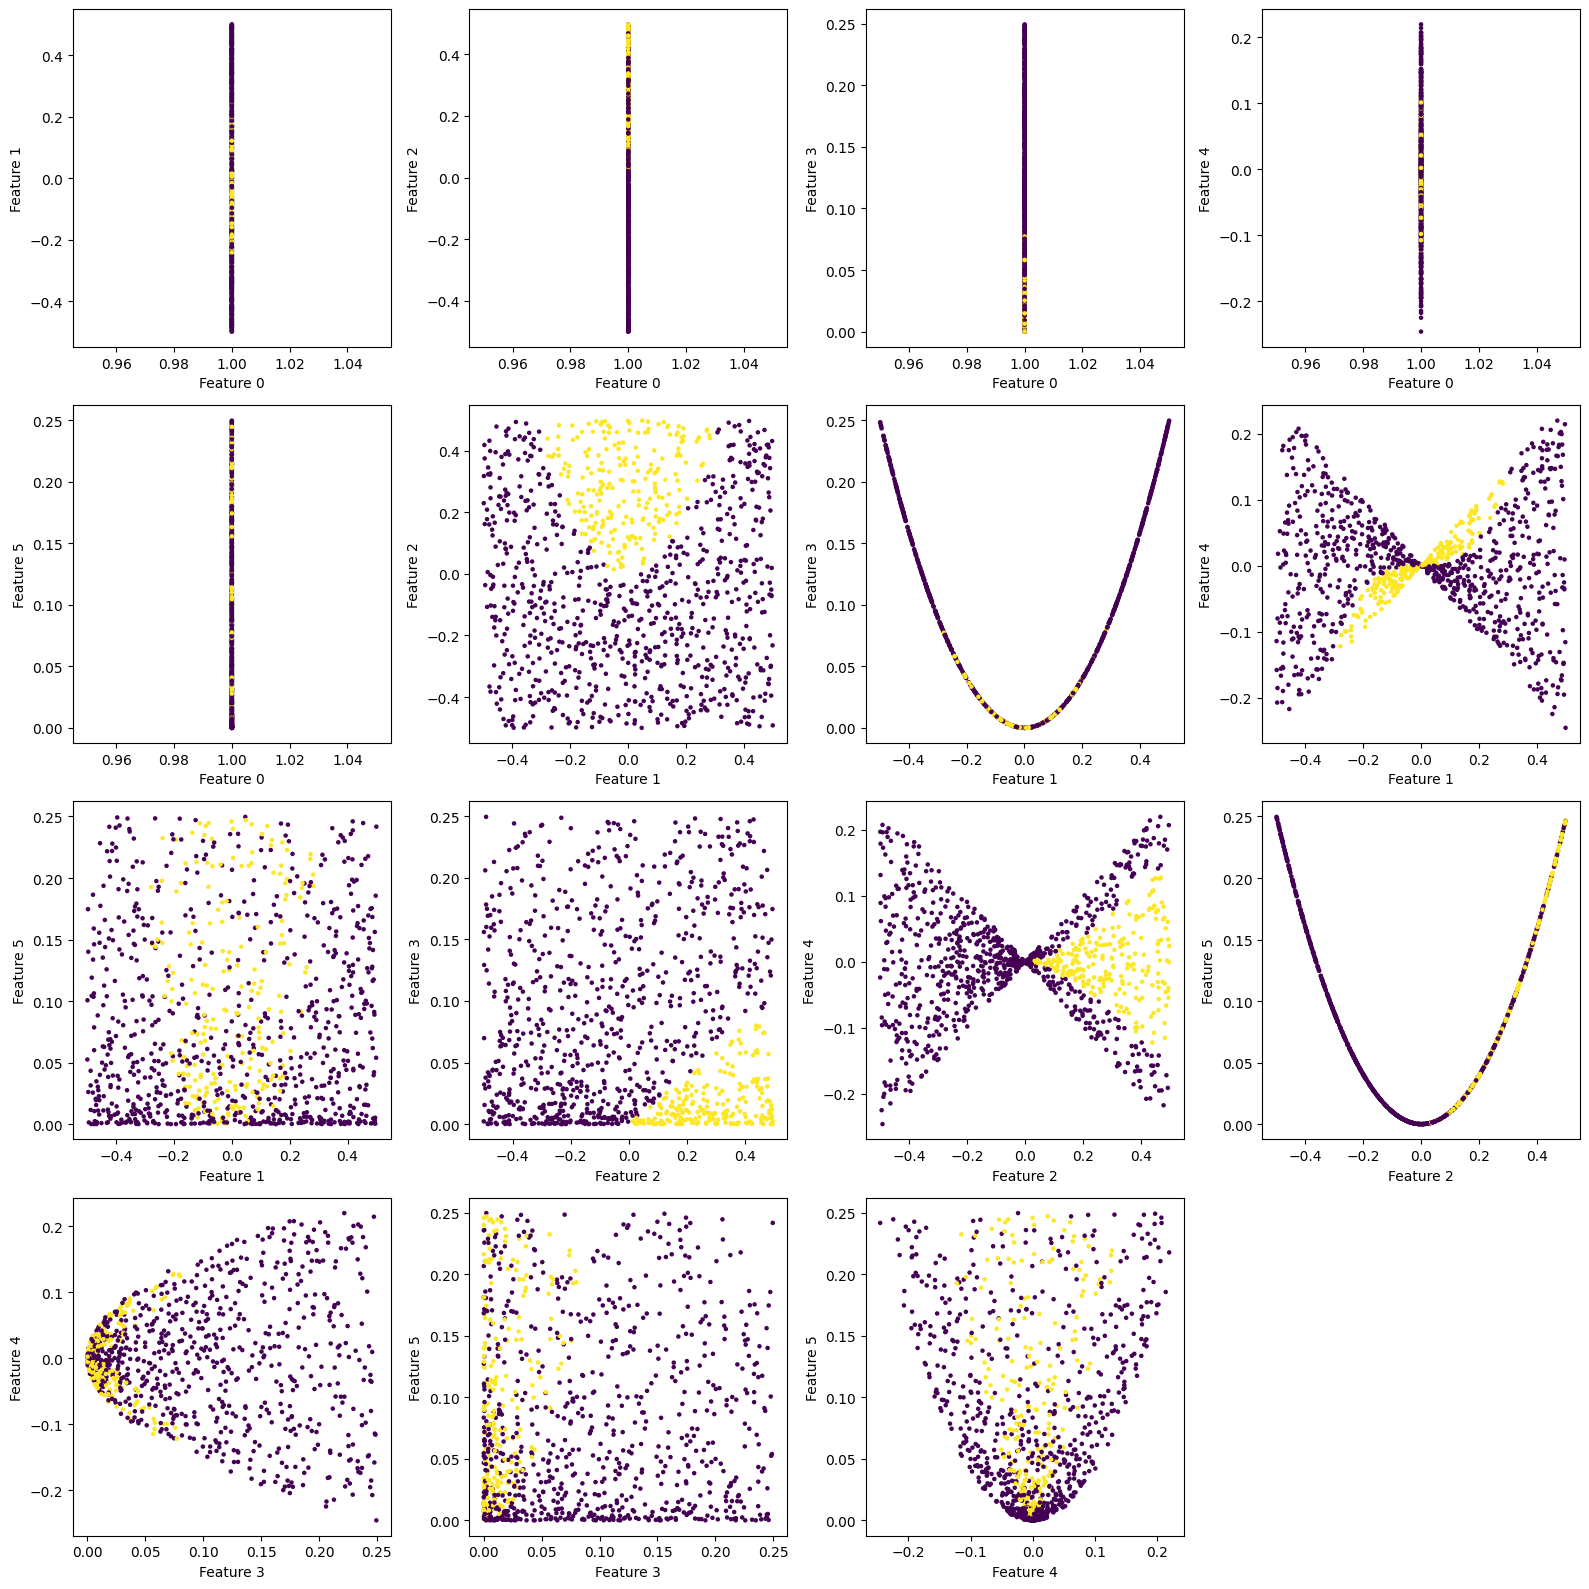

In [95]:
#Спярмяющее пространство
plt.figure(figsize=(16, 16))  # увеличиваем размер всей фигуры

k = 1
for i in range(x2.shape[1]):
    for j in range(i + 1, x2.shape[1]):
        plt.subplot(4, 4, k)
        plt.scatter(x2[:, i], x2[:, j], c=y, s=5)
        plt.xlabel(f'Feature {i}')
        plt.ylabel(f'Feature {j}')
        k += 1
plt.tight_layout()
plt.show()

In [96]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (6, )))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-1), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x2, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - loss: 0.5022   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8510 - loss: 0.3282 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8650 - loss: 0.2909 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.2666 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8930 - loss: 0.2442 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9030 - loss: 0.2275 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9160 - loss: 0.2120
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9290 - loss: 0.1986 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9410 - loss: 0.1883 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9440 - loss: 0.1775 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9510 - loss: 0.1698 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [98]:
#Feature importance 
from sklearn.datasets import make_regression
data, target = make_regression(n_samples = 1000, n_features = 6, n_informative = 3)
print(data.shape)
print(target.shape)


(1000, 6)
(1000,)


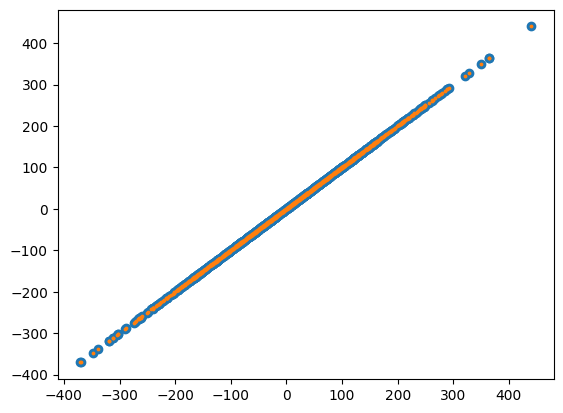

In [99]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(data, target)
yp = clf.predict(data)
plt.scatter(target, yp)
plt.scatter(target, target, s = 3)
plt.show()

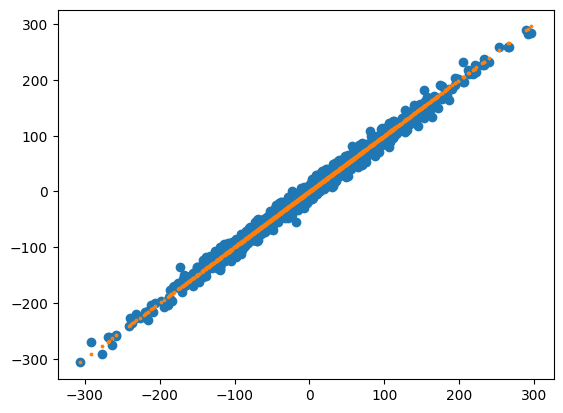

In [100]:
data, target = make_regression(n_samples = 1000, n_features = 6, n_informative = 3, noise = 10)

clf = LinearRegression()
clf.fit(data, target)
yp = clf.predict(data)
plt.scatter(target, yp)
plt.scatter(target, target, s = 3)
plt.show()

In [101]:
from scipy.stats import pearsonr
col_corr = []
for i in range(data.shape[1]):
    for j in range(i + 1, data.shape[1]):
        corr, p_value = pearsonr(data[:, i], data[:, j])
        if p_value > 0.05:
            col_corr.append([i, j])
print(col_corr)

[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 5], [3, 4], [3, 5], [4, 5]]
